In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  datetime import datetime

In [10]:
df = pd.read_csv('shampoo.csv')
df

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [17]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [18]:
series = pd.read_csv('shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [19]:
series

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
1901-06-01    168.5
1901-07-01    231.8
1901-08-01    224.5
1901-09-01    192.8
1901-10-01    122.9
1901-11-01    336.5
1901-12-01    185.9
1902-01-01    194.3
1902-02-01    149.5
1902-03-01    210.1
1902-04-01    273.3
1902-05-01    191.4
1902-06-01    287.0
1902-07-01    226.0
1902-08-01    303.6
1902-09-01    289.9
1902-10-01    421.6
1902-11-01    264.5
1902-12-01    342.3
1903-01-01    339.7
1903-02-01    440.4
1903-03-01    315.9
1903-04-01    439.3
1903-05-01    401.3
1903-06-01    437.4
1903-07-01    575.5
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales, dtype: float64

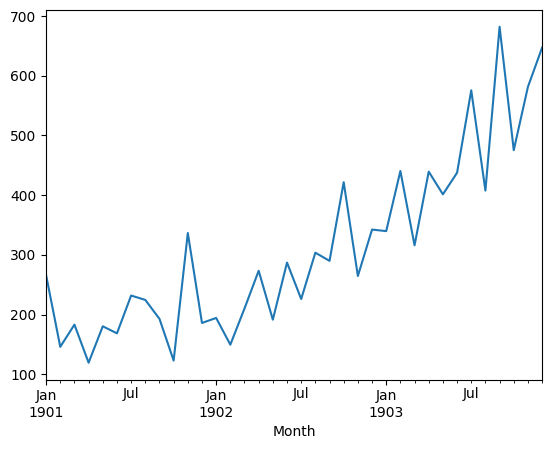

In [20]:
series.plot()
plt.show()

In [39]:
upsampled = series.resample('D')

In [40]:
upsampled.mean()

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
              ...  
1903-11-27      NaN
1903-11-28      NaN
1903-11-29      NaN
1903-11-30      NaN
1903-12-01    646.9
Freq: D, Name: Sales, Length: 1065, dtype: float64

In [41]:
interpolate = upsampled.interpolate(method= 'linear')

In [42]:
interpolate

Month
1901-01-01    266.000000
1901-01-02    262.125806
1901-01-03    258.251613
1901-01-04    254.377419
1901-01-05    250.503226
                 ...    
1903-11-27    638.153333
1903-11-28    640.340000
1903-11-29    642.526667
1903-11-30    644.713333
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64

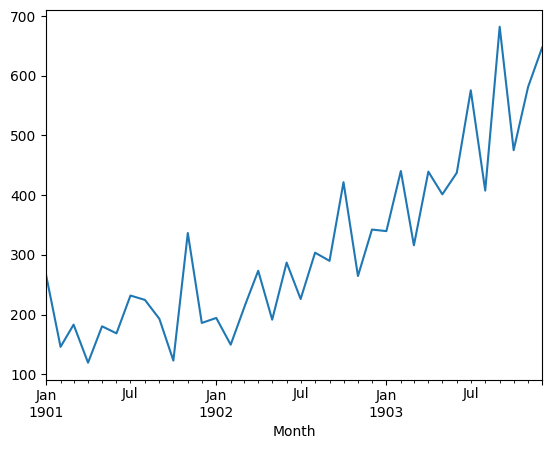

In [44]:
interpolate.plot()
plt.show()

In [45]:
interpolate2 = upsampled.interpolate(method= 'quadratic')
interpolate2

Month
1901-01-01    266.000000
1901-01-02    258.653962
1901-01-03    251.539381
1901-01-04    244.656256
1901-01-05    238.004587
                 ...    
1903-11-27    645.313391
1903-11-28    645.916583
1903-11-29    646.382082
1903-11-30    646.709888
1903-12-01    646.900000
Freq: D, Name: Sales, Length: 1065, dtype: float64

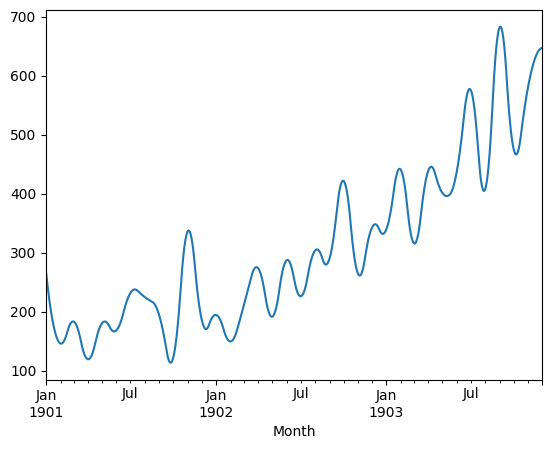

In [46]:
interpolate2.plot()
plt.show()